In [ ]:
# Assignment 1 —Linear Regression (California Houses)
#Task: implement Linear, Ridge, Lasso (manual + scikit-learn), compare results, and plot errors vs regularization parameter

#This notebook contains:
#- Data spliting (70/15/15 split)
#- Manual Linear Regression (Normal Equation + Gradient Descent)
#- Manual Ridge and Lasso
#- scikit-learn Linear, Ridge, Lasso
#- Comparison plots (manual vs sklearn) and MSE  MAE


In [146]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler


In [147]:
# Load Dataset
data = pd.read_csv("California_Houses.csv")
data

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [148]:
#removing nulls
data.dropna(inplace=True)
#checking for duplicates
data.duplicated().sum()

np.int64(0)

In [149]:
# Define features and target
# our target variable is Median_House_Value
X= data.drop('Median_House_Value', axis=1)
y= data['Median_House_Value']
#x
#y
# Split the dataset: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)
#total dataset = 20642
print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")


Train: 14448, Validation: 3096, Test: 3096


In [151]:
#  scaling for better results (important for gradient descent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [152]:

# Manual Linear Regression using Normal Equation: Y= WX

def normal_equation(X, y):  # returns optimal w, w = (X^T X)^(-1) X^T y
    # Add bias column of ones(intercept)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # Compute weights (w = (X^T X)^(-1) X^T y)
    return np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

w_normal = normal_equation(X_train_scaled, y_train)


In [153]:
# Predict
def predict(X, w):  #returns Y=XW
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(w)

y_pred_val_normal = predict(X_val_scaled, w_normal)



In [154]:
# Evaluate
mse_normal = mean_squared_error(y_val, y_pred_val_normal)
mae_normal = mean_absolute_error(y_val, y_pred_val_normal)
print("\nManual Linear Regression:")
print(f"MSE: {mse_normal:.2f}, MAE: {mae_normal:.2f}")


Manual Linear Regression:
MSE: 4907211997.37, MAE: 50790.06


In [155]:
#  Manual Gradient Descent Implementation

def gradient_descent(X, y, lr=0.01, epochs=1000, lam=0, l1=False):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    w = np.zeros(n + 1)

    for i in range(epochs):
        y_pred = X_b.dot(w)
        error = y_pred - y
        grad = (2/m) * X_b.T.dot(error)

        if l1 and lam > 0:
            # Apply L1 penalty (skip bias)
            grad[1:] += lam * np.sign(w[1:])

        w -= lr * grad

    return w


In [156]:
# testing Gradient Descent in linear regression
# Linear Regression (no regularization)
w_gd_linear = gradient_descent(X_train_scaled, y_train, lr=0.001, epochs=2000)
y_pred_val_gd_linear = predict(X_val_scaled, w_gd_linear)

mse_gd = mean_squared_error(y_val, y_pred_val_gd_linear)
mae_gd = mean_absolute_error(y_val, y_pred_val_gd_linear)
print("\n Gradient Descent Linear Regression:")
print(f"MSE: {mse_gd:.2f}, MAE: {mae_gd:.2f}")


 Gradient Descent Linear Regression:
MSE: 5311773076.57, MAE: 52865.54


In [157]:
# ridge manually
def ridge_normal_equation(X, y, lambda_):
    # ridge: w = (X^T X + lambda I)^(-1) X^T y

    Xb = np.c_[np.ones((X.shape[0], 1)), X]
    n_features = Xb.shape[1]
    I = np.eye(n_features)
    I[0, 0] = 0.0  # do not regularize the bias/intercept
    A = Xb.T.dot(Xb) + lambda_ * I
    w = np.linalg.inv(A).dot(Xb.T).dot(y)
    return w

In [158]:
#  Ridge and Lasso Regularization (Manual)

# lambdas = [0, 0.1, 1,10, 100]
#lambdas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
lambdas = lambdas = [0, 0.1, 1,10, 100]
mse_ridge, mae_ridge = [], []
mse_lasso, mae_lasso = [], []

for lam in lambdas:
    # Ridge
    w_ridge = ridge_normal_equation(X_train_scaled, y_train, lambda_=lam)
    y_pred_ridge = predict(X_val_scaled, w_ridge)
    mse_ridge.append(mean_squared_error(y_val, y_pred_ridge))
    mae_ridge.append(mean_absolute_error(y_val, y_pred_ridge))


    # Lasso
    w_lasso = gradient_descent(X_train_scaled, y_train, lr=0.001, epochs=2000, lam=0.1, l1=True)
    y_pred_lasso = predict(X_val_scaled, w_lasso)
    mse_lasso.append(mean_squared_error(y_val, y_pred_lasso))
    mae_lasso.append(mean_absolute_error(y_val, y_pred_lasso))

In [159]:
#selecting the best lambda
best_lambda_ridge = lambdas[np.argmin(mse_ridge)]
best_lambda_lasso = lambdas[np.argmin(mse_lasso)]
print(f"\nBest λ (Ridge): {best_lambda_ridge}, Best λ (Lasso): {best_lambda_lasso}")



Best λ (Ridge): 0, Best λ (Lasso): 0


In [160]:
#retraining data (training +validation) using the best lambda
X_train_val_scaled = np.vstack((X_train_scaled, X_val_scaled))
y_train_val = np.concatenate((y_train, y_val))

# Retrain best models
w_ridge_best = ridge_normal_equation(X_train_val_scaled, y_train_val, lambda_=best_lambda_ridge)
w_lasso_best = gradient_descent(X_train_val_scaled, y_train_val, lam=best_lambda_lasso, epochs=1000, l1=True)


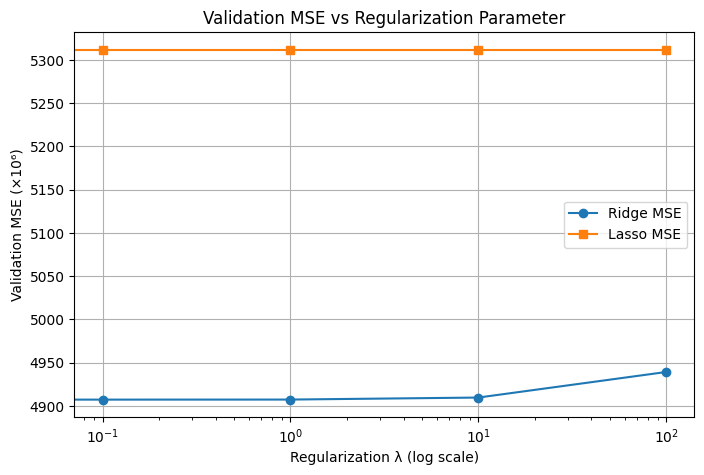

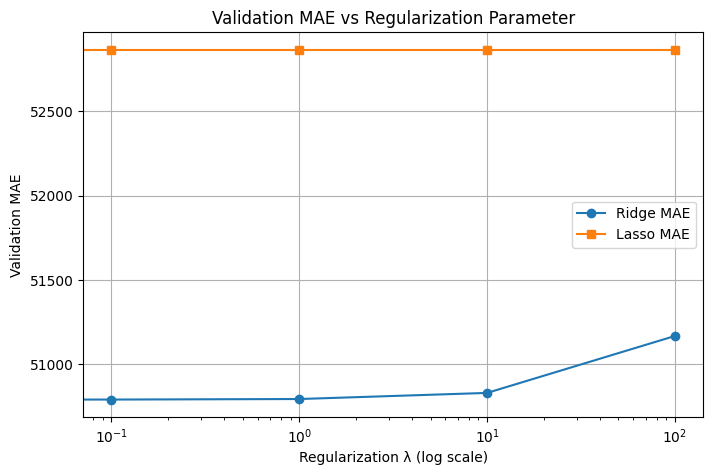

In [161]:
plt.figure(figsize=(8,5))
plt.plot(lambdas, np.array(mse_ridge)/1e6, 'o-', label='Ridge MSE')
plt.plot(lambdas, np.array(mse_lasso)/1e6, 's-', label='Lasso MSE')
plt.xscale('log')
plt.xlabel("Regularization λ (log scale)")
plt.ylabel("Validation MSE (×10⁶)")
plt.title("Validation MSE vs Regularization Parameter")
plt.legend()
plt.grid(True)
plt.show()

#  Plot MAE
plt.figure(figsize=(8,5))
plt.plot(lambdas, mae_ridge, 'o-', label='Ridge MAE')
plt.plot(lambdas, mae_lasso, 's-', label='Lasso MAE')
plt.xscale('log')
plt.xlabel("Regularization λ (log scale)")
plt.ylabel("Validation MAE")
plt.title("Validation MAE vs Regularization Parameter")
plt.legend()
plt.grid(True)
plt.show()



In [162]:
#final testing
y_pred_test_normal = predict(X_test_scaled, w_normal)             # Linear Regression (Normal Equation)
y_pred_test_gd = predict(X_test_scaled, w_gd_linear)              # Linear Regression (Gradient Descent)
y_pred_test_ridge = predict(X_test_scaled, w_ridge_best)          # Ridge Regression (Best λ)
y_pred_test_lasso = predict(X_test_scaled, w_lasso_best)          # Lasso Regression (Best λ)

# Display test results
print("Linear Regression (Normal Eq)  MSE:", mean_squared_error(y_test, y_pred_test_normal),
      "MAE:", mean_absolute_error(y_test, y_pred_test_normal))
print("Linear Regression (Gradient)   MSE:", mean_squared_error(y_test, y_pred_test_gd),
      "MAE:", mean_absolute_error(y_test, y_pred_test_gd))
print("Ridge Regression (λ={})        MSE:".format(best_lambda_ridge),
      mean_squared_error(y_test, y_pred_test_ridge),
      "MAE:", mean_absolute_error(y_test, y_pred_test_ridge))
print("Lasso Regression (λ={})        MSE:".format(best_lambda_lasso),
      mean_squared_error(y_test, y_pred_test_lasso),
      "MAE:", mean_absolute_error(y_test, y_pred_test_lasso))

Linear Regression (Normal Eq)  MSE: 4400953150.61374 MAE: 48782.03108085671
Linear Regression (Gradient)   MSE: 4789354344.33143 MAE: 51124.68823519898
Ridge Regression (λ=0)        MSE: 4400899654.054111 MAE: 48842.22517775812
Lasso Regression (λ=0)        MSE: 4486403047.096847 MAE: 49741.50406991109


In [163]:
#validate on validation set using scikit-learn
reg = LinearRegression().fit(np.vstack((X_train_scaled, X_val_scaled)), y_train_val)
ridge = Ridge(alpha=best_lambda_ridge).fit(np.vstack((X_train_scaled, X_val_scaled)), y_train_val)
lasso = Lasso(alpha=best_lambda_lasso).fit(np.vstack((X_train_scaled, X_val_scaled)), y_train_val)
#final testing
y_pred_test_lr = reg.predict(X_test_scaled)
y_pred_test_ridge = ridge.predict(X_test_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)

print("\nFinal Test Results (Scikit-Learn)")
print("Linear Regression  MSE:", mean_squared_error(y_test, y_pred_test_lr),
      "MAE:", mean_absolute_error(y_test, y_pred_test_lr))
print("Ridge Regression   MSE:", mean_squared_error(y_test, y_pred_test_ridge),
      "MAE:", mean_absolute_error(y_test, y_pred_test_ridge))
print("Lasso Regression   MSE:", mean_squared_error(y_test, y_pred_test_lasso),
      "MAE:", mean_absolute_error(y_test, y_pred_test_lasso))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(



Final Test Results (Scikit-Learn)
Linear Regression  MSE: 4400899654.054111 MAE: 48842.22517775813
Ridge Regression   MSE: 4400899654.054109 MAE: 48842.22517775813
Lasso Regression   MSE: 4400705934.128024 MAE: 48841.7482407151


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.176e+13, tolerance: 2.339e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
